# First Project (Covid 19 Cases)

Credits go to Mr Alex from Alex The Analyst Youtube channel. Link to the video: https://www.youtube.com/watch?v=qfyynHBFOsM

In [2]:
import pandas as pd
import sqlite3 as sql
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install ipython-sql

In [4]:
%load_ext sql

In [10]:
covid_death = pd.read_csv("CovidDeath.csv")
covid_death

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,3/1/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,4/1/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,5/1/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,6/1/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,7/1/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297232,ZWE,Africa,Zimbabwe,17/3/2023,16320539,264391.0,0.0,5.571,5672.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297233,ZWE,Africa,Zimbabwe,18/3/2023,16320539,264391.0,0.0,2.714,5672.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297234,ZWE,Africa,Zimbabwe,19/3/2023,16320539,264391.0,0.0,0.857,5672.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297235,ZWE,Africa,Zimbabwe,20/3/2023,16320539,264391.0,0.0,0.000,5672.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
%sql sqlite:///covid_death.db

In [11]:
conn = sql.connect('covid_death.db')

In [19]:
covid_death.to_sql('death_table', conn)

297237

In [20]:
%sql SELECT * FROM death_table WHERE location = 'Malaysia' LIMIT 5;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


index,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
155795,MYS,Asia,Malaysia,3/1/2020,33938216,None,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,None,None,None,None,None,None,None,None
155796,MYS,Asia,Malaysia,4/1/2020,33938216,None,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,None,None,None,None,None,None,None,None
155797,MYS,Asia,Malaysia,5/1/2020,33938216,None,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,None,None,None,None,None,None,None,None
155798,MYS,Asia,Malaysia,6/1/2020,33938216,None,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,None,None,None,None,None,None,None,None
155799,MYS,Asia,Malaysia,7/1/2020,33938216,None,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,None,None,None,None,None,None,None,None


In [14]:
# column names in covid_death dataframe 

list(covid_death.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'population',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million']

In [15]:
covid_vac = pd.read_csv("CovidVaccination.csv")
covid_vac

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,3/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,4/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,5/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,6/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,7/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297232,ZWE,Africa,Zimbabwe,17/3/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
297233,ZWE,Africa,Zimbabwe,18/3/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
297234,ZWE,Africa,Zimbabwe,19/3/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
297235,ZWE,Africa,Zimbabwe,20/3/2023,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [7]:
%sql sqlite:///covid_vaccination.db

In [16]:
conn = sql.connect('covid_vaccination.db')

In [17]:
covid_vac.to_sql('vac_table', conn)

297237

In [21]:
# column names in covid_vac dataframe 

list(covid_vac.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'population',
 'exc

In [22]:
%sql SELECT * FROM vac_table LIMIT 5;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


index,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,3/1/2020,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,54.422,18.6,2.581,1.337,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
1,AFG,Asia,Afghanistan,4/1/2020,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,54.422,18.6,2.581,1.337,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
2,AFG,Asia,Afghanistan,5/1/2020,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,54.422,18.6,2.581,1.337,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
3,AFG,Asia,Afghanistan,6/1/2020,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,54.422,18.6,2.581,1.337,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
4,AFG,Asia,Afghanistan,7/1/2020,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,54.422,18.6,2.581,1.337,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None


In [23]:
%sql PRAGMA table_info(death_table);

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,iso_code,TEXT,0,None,0
2,continent,TEXT,0,None,0
3,location,TEXT,0,None,0
4,date,TEXT,0,None,0
5,population,INTEGER,0,None,0
6,total_cases,REAL,0,None,0
7,new_cases,REAL,0,None,0
8,new_cases_smoothed,REAL,0,None,0
9,total_deaths,REAL,0,None,0


In [24]:
%sql SELECT DISTINCT location FROM death_table;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location
Afghanistan
Africa
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina


In [25]:
%sql SELECT count(DISTINCT location) AS [total countries] FROM death_table;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


total countries
255


In [26]:
%sql SELECT DISTINCT continent FROM death_table;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


continent
Asia
None
Europe
Africa
Oceania
North America
South America


In [27]:
%sql SELECT count(DISTINCT continent) AS [total continents] FROM death_table;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


total continents
6


In [28]:
# selecting the data to use 

%sql SELECT location, date, total_cases, new_cases, total_deaths, population FROM death_table WHERE continent is not null LIMIT 10;


   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,total_cases,new_cases,total_deaths,population
Afghanistan,3/1/2020,None,0.0,None,41128772
Afghanistan,4/1/2020,None,0.0,None,41128772
Afghanistan,5/1/2020,None,0.0,None,41128772
Afghanistan,6/1/2020,None,0.0,None,41128772
Afghanistan,7/1/2020,None,0.0,None,41128772
Afghanistan,8/1/2020,None,0.0,None,41128772
Afghanistan,9/1/2020,None,0.0,None,41128772
Afghanistan,10/1/2020,None,0.0,None,41128772
Afghanistan,11/1/2020,None,0.0,None,41128772
Afghanistan,12/1/2020,None,0.0,None,41128772


In [29]:
# total cases vs total deaths in Malaysia

%sql SELECT location, date, total_cases, new_cases, new_deaths, total_deaths, (total_deaths/total_cases)*100 as [Percentage] FROM death_table WHERE continent is not null AND location = 'Malaysia' GROUP BY total_cases;


   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,total_cases,new_cases,new_deaths,total_deaths,Percentage
Malaysia,3/1/2020,None,0.0,0.0,None,None
Malaysia,26/1/2020,4.0,4.0,0.0,None,None
Malaysia,30/1/2020,7.0,3.0,0.0,None,None
Malaysia,31/1/2020,8.0,1.0,0.0,None,None
Malaysia,4/2/2020,9.0,1.0,0.0,None,None
Malaysia,5/2/2020,10.0,1.0,0.0,None,None
Malaysia,6/2/2020,12.0,2.0,0.0,None,None
Malaysia,7/2/2020,14.0,2.0,0.0,None,None
Malaysia,8/2/2020,15.0,1.0,0.0,None,None
Malaysia,9/2/2020,16.0,1.0,0.0,None,None


Overview 

1) Malaysia recorded the first 4 Covid 19 cases on 26/1/2020

2) The first two deaths were recorded on 17/3/2020

### Highest Percentage of Covid19 Death Cases in Malaysia

In [30]:
# the highest percentage of covid 19 death cases recorded in Malaysia

%sql SELECT location, date, total_cases, new_cases, total_deaths, max(new_deaths)  as [max_death_count], (new_deaths/new_cases)*100 as [death_percent]FROM death_table WHERE location = 'Malaysia';

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,total_cases,new_cases,total_deaths,max_death_count,death_percent
Malaysia,12/9/2021,1960500.0,19550.0,20419.0,592.0,3.028132992327366


### Highest Percentage of Covid19 Confirmed Cases in Malaysia

In [31]:
# the highest percentage of covid 19 positive cases recorded in Malaysia

%sql SELECT location, date, total_cases, total_deaths, max(new_cases) as [max_positive_cases_count] FROM death_table WHERE location = 'Malaysia';

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,total_cases,total_deaths,max_positive_cases_count
Malaysia,6/3/2022,3595172.0,33173.0,33406.0


# Global

### Covid19 Cases Recorded Globally 

In [32]:
# Covid 19 cases globally

%sql SELECT location, date, max(total_cases) AS [total cases], max(total_deaths) AS [total deaths], (max(total_deaths)/max(total_cases))*100 AS [percentage] FROM death_table WHERE continent is not null GROUP BY location;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,total cases,total deaths,percentage
Afghanistan,13/3/2023,209848.0,7881.0,3.7555754641454766
Albania,20/3/2023,333726.0,3601.0,1.0790289039511454
Algeria,7/10/2022,271542.0,6881.0,2.5340462985468175
American Samoa,25/8/2022,8321.0,34.0,0.4086047350078116
Andorra,5/1/2023,47908.0,159.0,0.33188611505385324
Angola,21/2/2023,105298.0,1933.0,1.8357423692757697
Anguilla,6/9/2022,3904.0,12.0,0.3073770491803279
Antigua and Barbuda,23/9/2022,9106.0,146.0,1.6033384581594552
Argentina,5/3/2023,10044957.0,130472.0,1.2988806223859395
Armenia,13/3/2023,447730.0,8732.0,1.9502825363500325


### Statistics of highest to lowest death percentage

In [33]:
# country with highest death percentage to lowest 

%sql SELECT location, population, sum(new_cases) AS [sum of cases], sum(new_deaths) AS [sum of deaths], (sum(new_deaths)/sum(new_cases))*100 AS [death percentage] FROM death_table WHERE continent is not null GROUP BY location ORDER BY [death percentage] desc;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,population,sum of cases,sum of deaths,death percentage
Yemen,33696612,11945.0,2159.0,18.07450816241105
Sudan,46874200,63899.0,5026.0,7.8655378018435345
Syria,22125242,57423.0,3163.0,5.508245824843703
Somalia,17597508,27334.0,1361.0,4.979146850076828
Peru,34049588,4489377.0,219648.0,4.892616503358929
Egypt,110990096,515852.0,24819.0,4.811263695788714
Mexico,127504120,7511451.0,333327.0,4.437584695686626
Bosnia and Herzegovina,3233530,401973.0,16296.0,4.054003627109283
Afghanistan,41128772,209849.0,7881.0,3.7555575675843103
Liberia,5302690,8091.0,295.0,3.6460264491410213


In [34]:
# country with highest death percentage 

%sql SELECT location, population, max(total_cases) AS [sum of cases], max(total_deaths) AS [sum of deaths], (max(total_deaths)/max(total_cases))*100 AS [death percentage] FROM death_table WHERE continent is not null GROUP BY location ORDER BY [death percentage] desc;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,population,sum of cases,sum of deaths,death percentage
Yemen,33696612,11945.0,2159.0,18.07450816241105
Sudan,46874200,63899.0,5026.0,7.8655378018435345
Syria,22125242,57423.0,3163.0,5.508245824843703
Somalia,17597508,27334.0,1361.0,4.979146850076828
Peru,34049588,4489377.0,219648.0,4.892616503358929
Egypt,110990096,515852.0,24819.0,4.811263695788714
Mexico,127504120,7511450.0,333327.0,4.437585286462667
Bosnia and Herzegovina,3233530,401973.0,16296.0,4.054003627109283
Afghanistan,41128772,209848.0,7881.0,3.7555754641454766
Liberia,5302690,8090.0,294.0,3.634116192830655


### Highest to lowest death counts

In [35]:
# country with the highest death counts 

%sql SELECT location, population, max(total_deaths) AS [total death counts], (max(total_deaths)/population)*100 AS [percentage] FROM death_table WHERE continent is not null GROUP BY location ORDER BY [total death counts] desc;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,population,total death counts,percentage
United States,338289856,1114970.0,0.3295901370450789
Brazil,215313504,699634.0,0.3249373527449537
India,1417173120,530808.0,0.03745540982318377
Russia,144713312,396899.0,0.27426571509882935
Mexico,127504120,333327.0,0.2614244935771487
Peru,34049588,219648.0,0.6450826952737284
United Kingdom,67508936,209396.0,0.31017523369054434
Italy,59037472,188750.0,0.3197121990589299
Germany,83369840,169802.0,0.2036731748555593
France,67813000,161700.0,0.2384498547476148


### Highest to lowest infection rate 

In [36]:
# country with highest infection rate 

%sql SELECT location, date, max(total_cases) AS [infection count], population, (max(total_cases)/population)*100 AS [infected percentage] FROM death_table WHERE continent is not null GROUP BY location ORDER BY [infected percentage] desc;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,infection count,population,infected percentage
Cyprus,17/3/2023,653667.0,896007,72.95333630206015
San Marino,19/3/2023,23747.0,33690,70.48679133273968
Austria,21/3/2023,6003506.0,8939617,67.15618801118661
Faeroe Islands,2/3/2022,34658.0,53117,65.24841387879586
Slovenia,21/3/2023,1336426.0,2119843,63.0436310613569
Gibraltar,10/3/2023,20462.0,32677,62.618967469473944
Brunei,7/3/2023,280790.0,449002,62.53646977073599
Martinique,14/3/2023,229267.0,367512,62.38354121770173
Andorra,16/3/2023,47908.0,79843,60.00275540748719
Jersey,31/1/2023,66391.0,110796,59.92183833351385


### Highest confirmed cases recorded 

In [37]:
# highest number of positive cases recorded per country 

%sql SELECT location, date, max(new_cases) AS [highest number of cases recorded], population, (max(new_cases)/population)*100 AS [percentage] FROM death_table WHERE continent is not null GROUP BY location;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,highest number of cases recorded,population,percentage
Afghanistan,17/6/2021,3243.0,41128772,0.007884991071457226
Albania,20/1/2022,2832.0,2842318,0.09963698643149711
Algeria,26/1/2022,2521.0,44903228,0.0056142957027499225
American Samoa,26/3/2022,955.0,44295,2.15599954848177
Andorra,26/1/2022,1676.0,79843,2.099119522062047
Angola,2/1/2022,5611.0,35588996,0.015766109277148478
Anguilla,11/5/2022,196.0,15877,1.2344901429741135
Antigua and Barbuda,11/2/2022,468.0,93772,0.49908288188371797
Argentina,11/1/2022,135401.0,45510324,0.2975171084257717
Armenia,3/2/2022,4388.0,2780472,0.15781493214101777


### Death counts per continent 

In [38]:
# highest death counts per continent

%sql SELECT continent, max(total_deaths) AS [total death counts] FROM death_table WHERE continent is not null GROUP BY continent ORDER BY [total death counts] desc

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


continent,total death counts
North America,1114970.0
South America,699634.0
Asia,530808.0
Europe,396899.0
Africa,102595.0
Oceania,19447.0


In [39]:
%sql PRAGMA table_info(vac_table);

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,iso_code,TEXT,0,None,0
2,continent,TEXT,0,None,0
3,location,TEXT,0,None,0
4,date,TEXT,0,None,0
5,total_tests,REAL,0,None,0
6,new_tests,REAL,0,None,0
7,total_tests_per_thousand,REAL,0,None,0
8,new_tests_per_thousand,REAL,0,None,0
9,new_tests_smoothed,REAL,0,None,0


In [40]:
%sql SELECT dea.continent, dea.location, dea.date, dea.population, vac.people_vaccinated, vac.new_vaccinations, vac.total_vaccinations, dea.total_deaths FROM death_table AS dea JOIN vac_table AS vac ON dea.location = vac.location AND dea.date = vac.date WHERE dea.continent IS NOT NULL AND dea.location = 'Malaysia'

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


continent,location,date,population,people_vaccinated,new_vaccinations,total_vaccinations,total_deaths
Asia,Malaysia,3/1/2020,33938216,None,None,None,None
Asia,Malaysia,4/1/2020,33938216,None,None,None,None
Asia,Malaysia,5/1/2020,33938216,None,None,None,None
Asia,Malaysia,6/1/2020,33938216,None,None,None,None
Asia,Malaysia,7/1/2020,33938216,None,None,None,None
Asia,Malaysia,8/1/2020,33938216,None,None,None,None
Asia,Malaysia,9/1/2020,33938216,None,None,None,None
Asia,Malaysia,10/1/2020,33938216,None,None,None,None
Asia,Malaysia,11/1/2020,33938216,None,None,None,None
Asia,Malaysia,12/1/2020,33938216,None,None,None,None


Malaysian first got vaccinated on 24/02/2021, mostly for the frontliners. 

In [42]:
# create temporary table

%sql CREATE TEMP TABLE my_covid AS SELECT  dea.location, dea.date, dea.population, vac.people_vaccinated, vac.new_vaccinations, vac.total_vaccinations, dea.new_cases, dea.new_deaths, dea.total_cases, dea.total_deaths, (dea.total_deaths/vac.people_vaccinated)*100 AS [death vs vaccinated people percent], (dea.total_deaths/dea.total_cases)*100 AS [death vs cases percent] FROM death_table AS dea JOIN vac_table AS vac ON dea.location = vac.location AND dea.date = vac.date WHERE dea.continent IS NOT NULL AND dea.location = 'Malaysia'


   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


[]

In [43]:
%sql SELECT * FROM my_covid;

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


location,date,population,people_vaccinated,new_vaccinations,total_vaccinations,new_cases,new_deaths,total_cases,total_deaths,death vs vaccinated people percent,death vs cases percent
Malaysia,3/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,4/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,5/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,6/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,7/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,8/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,9/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,10/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,11/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None
Malaysia,12/1/2020,33938216,None,None,None,0.0,0.0,None,None,None,None


## Convert temporary table into dataframe 

In [44]:
mycovid_df = %sql SELECT * FROM my_covid

   sqlite:///covid_death.db
 * sqlite:///covid_vaccination.db
Done.


In [45]:
df_mycovid: pd.DataFrame = mycovid_df.DataFrame()

In [46]:
df_mycovid.head()

,location,date,population,people_vaccinated,new_vaccinations,total_vaccinations,new_cases,new_deaths,total_cases,total_deaths,death vs vaccinated people percent,death vs cases percent
0,Malaysia,3/1/2020,33938216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,Malaysia,4/1/2020,33938216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,Malaysia,5/1/2020,33938216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,Malaysia,6/1/2020,33938216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,Malaysia,7/1/2020,33938216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Visualizations

### Death counts were the highest in 2021 and gradually decreases as vaccination rate increases

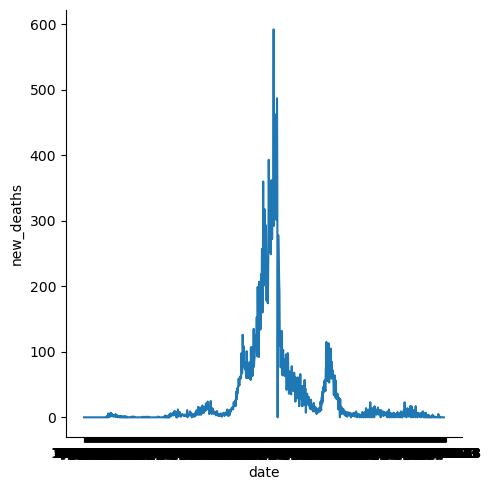

In [47]:
sns.relplot(x="date", y="new_deaths", kind="line", data=df_mycovid)


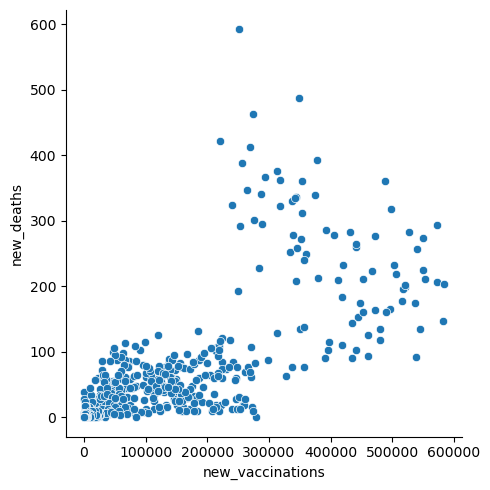

In [67]:
sns.relplot(x="new_vaccinations", y="new_deaths", data=df_mycovid)

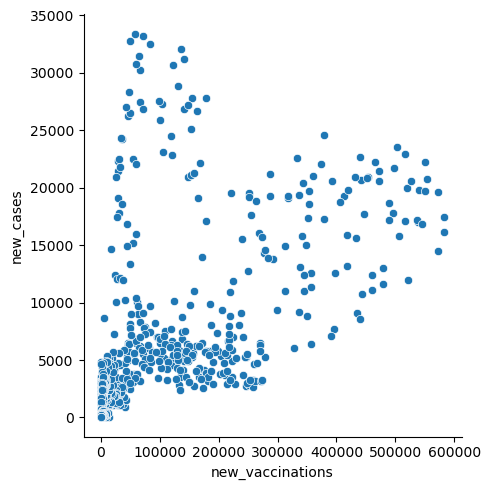

In [68]:
sns.relplot(x="new_vaccinations", y="new_cases", data=df_mycovid)

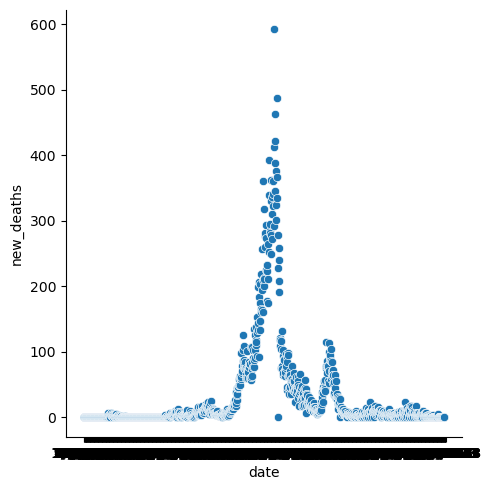

In [65]:
sns.relplot(x="date", y="new_deaths", data=df_mycovid)

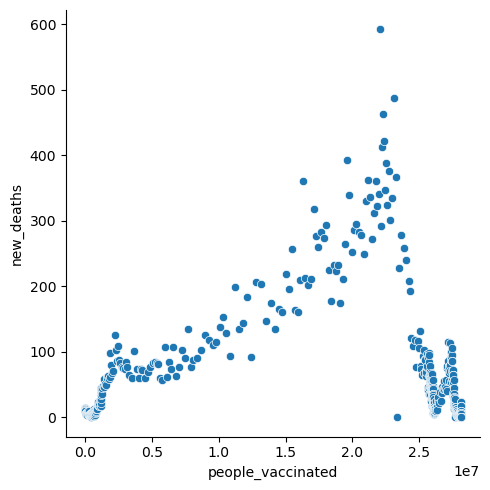

In [64]:
sns.relplot(x="people_vaccinated", y="new_deaths", data=df_mycovid)

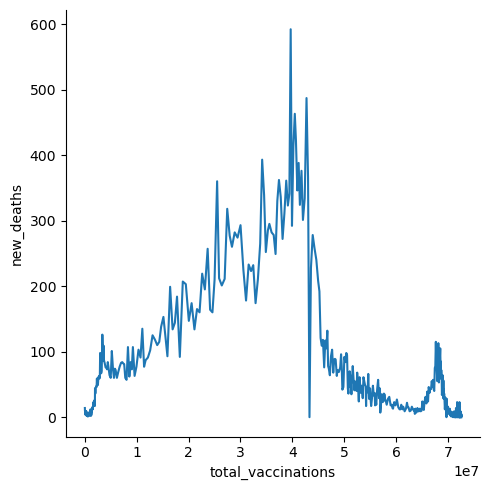

In [57]:
sns.relplot(x="total_vaccinations", y="new_deaths", kind="line", data=df_mycovid)

In [ ]:
%sql DROP TABLE my_covid;